In [1]:
import sys
sys.path.append("./utils/") # Adds higher directory to python modules path.
import random
import numpy as np
import cv2
import yaml
import glob, os
import loadcoraldata_utils as coralutils
import json
import importlib
from NeMO_generator import NeMOImageGenerator, ImageSetLoader
from osgeo import gdal
from sklearn.manifold import TSNE

from matplotlib import colors
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib notebook

jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["VedConsolidated_ClassDict"])

cmap = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                              'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])


Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["VedConsolidated_ClassDict"])

cmap = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                              'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])
mosaic_count = 1

print("Mosaic Count: ", mosaic_count)
imgpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
truthpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'
lorespathfile = './test_rasterlores.TIF'

Fiji = coralutils.CoralData(imgpath, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Fiji.Consolidate_classes(newclassdict=json_data["L3_ClassDict"], transferdict=json_data["Fiji2L3_Dict"])
Fiji.Consolidate_classes(newclassdict=json_data["VedConsolidated_ClassDict"], transferdict=json_data["L32VedConsolidated_Dict"])

Fiji.export_raster_lores(lorespathfile, downscale=0.5)


Mosaic Count:  1
Warning! Truth image not in expected format... loading directly whole image using cv2...


./utils/loadcoraldata_utils.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  self.consolclass_weights = dict((k, (self.truthimage_consolidated.shape[0]*self.truthimage_consolidated.shape[1])/(self.truthimage_consolidated==newclassdict[k]).sum()) for k in newclassdict)


34.007137298583984 34.63616932070441 42.91673346594269 46.82122499425169
819.0 578.6291530734729 625.7647543796671 623.2651840802712


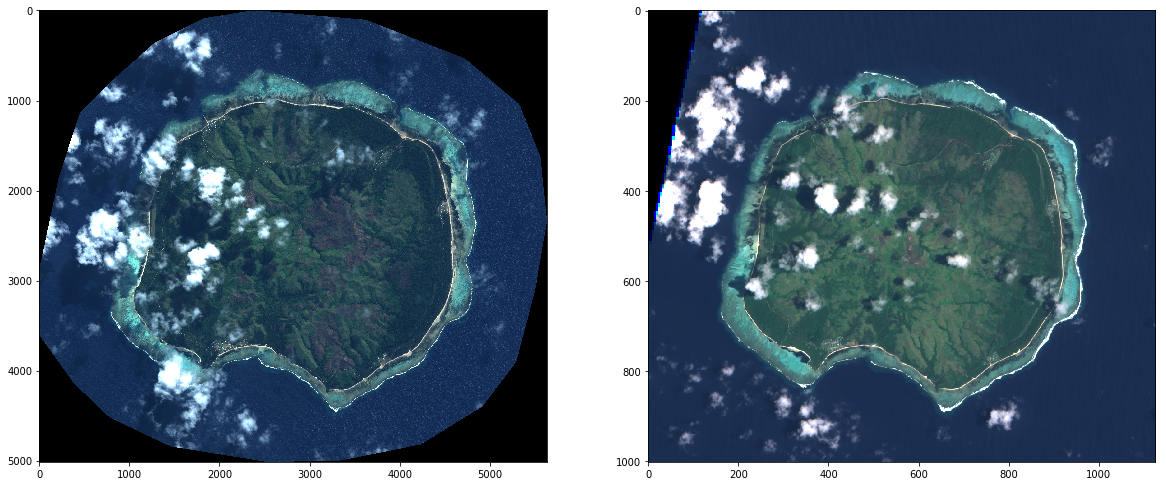

In [3]:
# filepath1 = '../Images/Fiji_SR_Patches_64/Lagoonal floor macroalgae on sediment/Lagoonal floor macroalgae on sediment_00000072.tif'
filepath1 = "/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_001.TIF"
filepath2 = '../Images/Fiji_SR_Patches_256/Lagoonal floor macroalgae on sediment/Lagoonal floor macroalgae on sediment_00000072.tif'
filepath3 = "/home/shared/NeMO-Net Data/Sentinel/Cicia/STL_4band_2016-01-17.tif"
Fiji_WV2 = coralutils.CoralData(filepath1, load_type="raster")
Fiji_Sentinel = coralutils.CoralData(filepath3, load_type="raster")

# Stretch RGB image
print(np.median(Fiji_WV2.image), np.std(Fiji_WV2.image[:,:,4]), np.std(Fiji_WV2.image[:,:,2]), np.std(Fiji_WV2.image[:,:,1]))
patch_R = 255/200*Fiji_WV2.image[:,:,4]
patch_G = 255/200*Fiji_WV2.image[:,:,2]
patch_B = 255/200*Fiji_WV2.image[:,:,1]
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
Fiji_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
Fiji_RGB[Fiji_RGB > 255] = 255

fig = plt.figure(1,figsize=(20,20))
ax = plt.subplot(1,2,1)
ax.imshow(Fiji_RGB)

print(np.median(Fiji_Sentinel.image), np.std(Fiji_Sentinel.image[:,:,2]), np.std(Fiji_Sentinel.image[:,:,1]), np.std(Fiji_Sentinel.image[:,:,0]))
patch_R = 255/3000*Fiji_Sentinel.image[:,:,0]
patch_G = 255/3000*Fiji_Sentinel.image[:,:,1]
patch_B = 255/3000*Fiji_Sentinel.image[:,:,2]
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
Fiji_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
Fiji_RGB[Fiji_RGB > 255] = 255
ax = plt.subplot(1,2,2)
ax.imshow(Fiji_RGB)
plt.show()

In [10]:
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
consolclass_count = dict((k, 0) for k in json_data["VedConsolidated_ClassDict"])

cmap = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                              'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])

# mosaics = [1,2,3,4,5,6,10,11,12,13,14,15,16,17,18,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]
# mosaics = [1]
mosaics = [1,2,3,4,5,6,10,11,12,14,15,16,17,18,20,23,24,25,26,27,31,32,33,39,40,41]

output_trainpath = '../Images/Fiji_SR_Patches_v2_128/'
output_trainrefpath = '../Images/Fiji_SR_Patches_v2_256/'
if not os.path.exists(output_trainpath):
    os.makedirs(output_trainpath)
if not os.path.exists(output_trainpath):
    os.makedirs(output_trainrefpath)
output_trainfilename = 'rastervalid.txt'

lorespathfile = './test_rasterlores.TIF'

for mosaic_count in mosaics:
    print("Mosaic Count: ", mosaic_count)
    imgpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
    truthpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'

    Fiji = coralutils.CoralData(imgpath, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
    Fiji.Consolidate_classes(newclassdict=json_data["L3_ClassDict"], transferdict=json_data["Fiji2L3_Dict"])
    Fiji.Consolidate_classes(newclassdict=json_data["VedConsolidated_ClassDict"], transferdict=json_data["L32VedConsolidated_Dict"])
    Fiji.export_raster_lores(lorespathfile, downscale=0.5)
    
    Fiji_lores = coralutils.CoralData(lorespathfile, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
    print("Outputing Training...")
    Fiji_lores.export_segmentation_map(output_trainpath, output_trainrefpath, output_trainfilename, image_size = 256, magnification=2,
                                  magimg_path=imgpath, N = 10, lastchannelremove = False, subdir=True, cont=True, consolidated = False)
    print("\n")
    
#     print("Outputing Training...")
#     Fiji.export_segmentation_map(output_trainpath, output_trainrefpath, 
#                                         output_trainfilename, image_size=256, magnification=4, magimg_path=imgpath, 
#                                         N=10, lastchannelremove=False, 
#                                         subdir=True, cont=False, consolidated = True, 
#                                         exporttype=gdal.GDT_Float32, label_cmap=cmap)

    # print("Outputing Validation...")
    # Fiji.export_segmentation_map(output_validpath, output_validrefpath, 
    #                                     output_validfilename, image_size=256, N=5, lastchannelremove=False, 
    #                                     subdir=True, cont=True, consolidated = True,
    #                                     mosaic_mean = mosaic_mean, mosaic_std = mosaic_std)
    
#     for k in Fiji.consolidated_class_dict:
#         consolclass_count[k] = consolclass_count[k] + Fiji.consolclass_count[k]
        
# total_pixels = np.sum([consolclass_count[k] for k in Fiji.consolidated_class_dict])
# consolclass_weights = dict((k, total_pixels/consolclass_count[k]) for k in Fiji.consolidated_class_dict)
# for k in consolclass_weights:
#     if consolclass_weights[k] == float("inf"):
#         consolclass_weights[k] = 0

Mosaic Count:  1
Warning! Truth image not in expected format... loading directly whole image using cv2...


./utils/loadcoraldata_utils.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  self.consolclass_weights = dict((k, (self.truthimage_consolidated.shape[0]*self.truthimage_consolidated.shape[1])/(self.truthimage_consolidated==newclassdict[k]).sum()) for k in newclassdict)


Warning! Truth image not in expected format... loading directly whole image using cv2...
Outputing Training...
17 of 39 total classes found and saved


Mosaic Count:  2
Warning! Truth image not in expected format... loading directly whole image using cv2...
Warning! Truth image not in expected format... loading directly whole image using cv2...
Outputing Training...
17 of 39 total classes found and saved


Mosaic Count:  3
Warning! Truth image not in expected format... loading directly whole image using cv2...
Warning! Truth image not in expected format... loading directly whole image using cv2...
Outputing Training...
17 of 39 total classes found and saved


Mosaic Count:  4
Warning! Truth image not in expected format... loading directly whole image using cv2...
Warning! Truth image not in expected format... loading directly whole image using cv2...
Outputing Training...
26 of 39 total classes found and saved


Mosaic Count:  5
Warning! Truth image not in expected format... loading di

AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'

In [8]:
mosaic_count = 1
lorespathfile = './test_rasterlores.TIF'
imgpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_' + str(mosaic_count).zfill(3) + '.TIF'
truthpath = '/home/shared/NeMO-Net Data/processed_Fiji_files/truth_classes_wcldMask_' + str(mosaic_count).zfill(3) + '.TIF'
Fiji_lores = coralutils.CoralData(lorespathfile, Truthpath=truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")

truthimage = cv2.imread(truthpath)
print(Fiji_lores.geotransform)
print(Fiji_lores.image.shape)
print(Fiji_lores.truthimage[500,500,:])

1253 8.0 2.0
(249118.0, 8.0, 0.0, 8041246.0, 0.0, -8.0)
(1253, 1408, 8)
[27 27 27]


[[[ 77.74608612  77.36238098  62.92299652 ...  69.52734375  98.3136673
    60.07435226]
  [ 80.55135345  77.36238098  66.01394653 ...  79.43735504 113.32499695
    69.42336273]
  [ 79.34909821  77.36238098  64.68925476 ...  79.5946579  117.76496887
    74.79210663]
  ...
  [ 77.5457077   80.71139526  65.79316711 ...  34.44906998  24.73698616
     9.71927071]
  [ 78.54759216  80.37649536  63.14377594 ...  37.59510422  24.31413269
     9.81183529]
  [ 79.34909821  77.02747345  58.28656387 ...  34.92097473  21.14272308
    10.18209362]]

 [[ 77.14495087  72.3388443   56.74108887 ...  58.04432297  85.41660309
    51.74354553]
  [ 78.74796295  74.34825897  59.16969299 ...  74.24639893  87.95372772
    55.3535614 ]
  [ 78.14683533  73.67845154  62.26064682 ...  77.54973602  96.83367157
    62.01820374]
  ...
  [ 80.75173187  81.7161026   66.455513   ...  41.84225082  29.81124115
    12.21851158]
  [ 82.35474396  74.34825897  53.87091446 ...  37.75240707  28.54267693
    10.92260933]
  [ 80.3

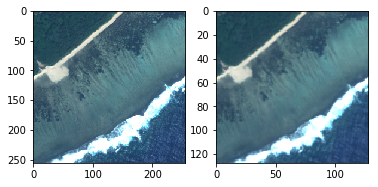

In [3]:
filepath1 = '../Images/Fiji_SR_Patches_v2_256/Back reef pavement/Back reef pavement_00000010.tif'
filepath2 = '../Images/Fiji_SR_Patches_v2_128/Back reef pavement/Back reef pavement_00000010.tif'
testpatch1 = coralutils.CoralData(filepath1, load_type="raster")
testpatch2 = coralutils.CoralData(filepath2, load_type="raster")
print(testpatch1.image)
print(testpatch2.image)

# Stretch RGB image
patch_R = 255/200*testpatch1.image[:,:,4]
patch_G = 255/200*testpatch1.image[:,:,2]
patch_B = 255/200*testpatch1.image[:,:,1]
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
testpatch1_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
testpatch1_RGB[testpatch1_RGB > 255] = 255

fig = plt.figure()
ax = plt.subplot(1,2,1)
ax.imshow(testpatch1_RGB)

# Stretch RGB image
patch_R = 255/200*testpatch2.image[:,:,4]
patch_G = 255/200*testpatch2.image[:,:,2]
patch_B = 255/200*testpatch2.image[:,:,1]
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
testpatch2_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)
testpatch2_RGB[testpatch2_RGB > 255] = 255

ax = plt.subplot(1,2,2)
ax.imshow(testpatch2_RGB)